## Football Match Result Prediction - Using Neural Network 1
### Using author's configurations
<p>
<strong>
@author Avinash Rai <br/>
@lastmodified 09/03/2021
</strong>
</p>

In [2]:
import os, sys
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten
from tensorflow.keras.optimizers import Adam

from sklearn import metrics
from utilities import getTrainTestDataset, cat_3_confusion_matrix
import matplotlib.pyplot as plt

In [3]:
X_train_epl, X_test_epl, y_train_epl, y_test_epl = getTrainTestDataset("pickles\dataset-epl.pickle")
X_train_spl, X_test_spl, y_train_spl, y_test_spl = getTrainTestDataset("pickles\dataset-spl.pickle")
print(X_train_epl.shape)
print(X_train_spl.shape)
print(X_test_epl.shape)
print(X_test_spl.shape)

(1772, 29)
(1775, 29)
(874, 29)
(875, 29)


In [4]:
X_train_epl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
1526,-0.867168,-0.149891,-0.368570,-0.491395,-1.030352,-0.160132,-0.539587,0.291926,-0.945089,-1.174424,...,3,0,0,0,0,1,0,0,0,14
157,0.588288,2.467009,1.524303,1.000785,0.743320,2.278740,-0.783542,1.573927,-1.650598,-1.584578,...,3,0,0,0,0,0,0,0,0,7
1574,0.467000,2.162718,0.375059,1.272091,1.393667,1.921832,0.131290,1.024498,-0.560267,-0.969348,...,3,0,0,0,0,0,0,0,0,4
1850,-1.412963,-1.184480,-1.450211,-1.508791,-1.148597,-1.111887,-0.112666,0.169831,-0.047170,0.056036,...,1,0,0,0,0,0,0,0,0,6
38,-0.260728,0.397832,0.645469,-0.423569,-0.498251,0.553684,-0.844531,0.780307,-1.137501,-0.149041,...,0,0,0,0,0,0,0,0,0,15


In [5]:
X_train_spl.head()

,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HTGD,ATGD,DiffPts,DiffFormPts,...,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,DiffLP
2020,-1.153904,-1.099911,-1.389243,-1.243118,-0.980697,-0.935257,0.067027,-0.012995,-0.048462,-0.132584,...,1,0,0,0,0,0,0,0,0,2
1143,0.694261,0.728530,1.434441,1.436632,0.923569,0.907177,-0.559609,-0.521091,0.016695,-1.185784,...,1,0,0,1,0,0,0,0,0,1
230,-0.865129,-0.528523,-0.798239,-0.262722,-0.861680,-0.578657,-0.160840,-0.295271,-0.309092,0.288696,...,0,0,0,0,0,0,0,0,0,4
1236,-0.114312,-0.299968,-1.257908,-0.720240,0.507011,-0.281490,0.978498,0.325735,0.863741,1.131256,...,3,0,0,0,0,0,0,0,0,-7
157,-0.980639,-0.757078,-0.404237,-0.197362,-1.040205,-1.113557,-0.616575,-0.577546,0.081852,0.288696,...,3,0,0,0,0,0,0,0,0,-2


## Basic Neural Network model

In [6]:
# Build model using Keras Sequential Model
input_shape = ( X_train_epl.shape[1], )
baseModel = Sequential( name="Base_Model" )
baseModel.add( Dense(41, activation='relu', input_shape=input_shape, kernel_initializer="he_normal"  ) )
baseModel.add( Dense(75, activation='relu', kernel_initializer="he_normal" ) )   
baseModel.add( Dense(3 , activation='softmax') )
baseModel.compile( optimizer=Adam(learning_rate=0.00001), 
    loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
baseModel.summary()

Model: "Base_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 41)                1230      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 228       
Total params: 4,608
Trainable params: 4,608
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
trainEpl = baseModel.fit( 
    X_train_epl, 
    y_train_epl, 
    epochs = 500, 
    validation_data = (X_test_epl,y_test_epl), 
    verbose = 2, 
    callbacks = [earlyStopping]
)

Train on 1772 samples, validate on 874 samples
Epoch 1/500
1772/1772 - 0s - loss: 2.0657 - accuracy: 0.3104 - val_loss: 2.0172 - val_accuracy: 0.3089
Epoch 2/500
1772/1772 - 0s - loss: 1.9826 - accuracy: 0.3076 - val_loss: 1.9353 - val_accuracy: 0.3158
Epoch 3/500
1772/1772 - 0s - loss: 1.9024 - accuracy: 0.3093 - val_loss: 1.8565 - val_accuracy: 0.3135
Epoch 4/500
1772/1772 - 0s - loss: 1.8258 - accuracy: 0.3138 - val_loss: 1.7819 - val_accuracy: 0.3181
Epoch 5/500
1772/1772 - 0s - loss: 1.7529 - accuracy: 0.3160 - val_loss: 1.7114 - val_accuracy: 0.3135
Epoch 6/500
1772/1772 - 0s - loss: 1.6842 - accuracy: 0.3143 - val_loss: 1.6436 - val_accuracy: 0.3158
Epoch 7/500
1772/1772 - 0s - loss: 1.6199 - accuracy: 0.3143 - val_loss: 1.5826 - val_accuracy: 0.3158
Epoch 8/500
1772/1772 - 0s - loss: 1.5596 - accuracy: 0.3222 - val_loss: 1.5246 - val_accuracy: 0.3215
Epoch 9/500
1772/1772 - 0s - loss: 1.5034 - accuracy: 0.3262 - val_loss: 1.4713 - val_accuracy: 0.3284
Epoch 10/500
1772/1772 - 0

Epoch 80/500
1772/1772 - 0s - loss: 1.0578 - accuracy: 0.4898 - val_loss: 1.0790 - val_accuracy: 0.4897
Epoch 81/500
1772/1772 - 0s - loss: 1.0569 - accuracy: 0.4898 - val_loss: 1.0784 - val_accuracy: 0.4886
Epoch 82/500
1772/1772 - 0s - loss: 1.0559 - accuracy: 0.4898 - val_loss: 1.0779 - val_accuracy: 0.4908
Epoch 83/500
1772/1772 - 0s - loss: 1.0550 - accuracy: 0.4887 - val_loss: 1.0770 - val_accuracy: 0.4897
Epoch 84/500
1772/1772 - 0s - loss: 1.0542 - accuracy: 0.4898 - val_loss: 1.0765 - val_accuracy: 0.4920
Epoch 85/500
1772/1772 - 0s - loss: 1.0533 - accuracy: 0.4887 - val_loss: 1.0757 - val_accuracy: 0.4920
Epoch 86/500
1772/1772 - 0s - loss: 1.0524 - accuracy: 0.4904 - val_loss: 1.0753 - val_accuracy: 0.4931
Epoch 87/500
1772/1772 - 0s - loss: 1.0516 - accuracy: 0.4910 - val_loss: 1.0746 - val_accuracy: 0.4931
Epoch 88/500
1772/1772 - 0s - loss: 1.0507 - accuracy: 0.4921 - val_loss: 1.0739 - val_accuracy: 0.4931
Epoch 89/500
1772/1772 - 0s - loss: 1.0498 - accuracy: 0.4910 - 

Epoch 159/500
1772/1772 - 0s - loss: 1.0066 - accuracy: 0.5141 - val_loss: 1.0483 - val_accuracy: 0.4931
Epoch 160/500
1772/1772 - 0s - loss: 1.0063 - accuracy: 0.5152 - val_loss: 1.0481 - val_accuracy: 0.4931
Epoch 161/500
1772/1772 - 0s - loss: 1.0058 - accuracy: 0.5141 - val_loss: 1.0479 - val_accuracy: 0.4943
Epoch 162/500
1772/1772 - 0s - loss: 1.0053 - accuracy: 0.5135 - val_loss: 1.0477 - val_accuracy: 0.4931
Epoch 163/500
1772/1772 - 0s - loss: 1.0049 - accuracy: 0.5119 - val_loss: 1.0475 - val_accuracy: 0.4920
Epoch 164/500
1772/1772 - 0s - loss: 1.0044 - accuracy: 0.5130 - val_loss: 1.0472 - val_accuracy: 0.4897
Epoch 165/500
1772/1772 - 0s - loss: 1.0040 - accuracy: 0.5130 - val_loss: 1.0469 - val_accuracy: 0.4908
Epoch 166/500
1772/1772 - 0s - loss: 1.0036 - accuracy: 0.5124 - val_loss: 1.0468 - val_accuracy: 0.4908
Epoch 167/500
1772/1772 - 0s - loss: 1.0032 - accuracy: 0.5135 - val_loss: 1.0465 - val_accuracy: 0.4874
Epoch 168/500
1772/1772 - 0s - loss: 1.0028 - accuracy:

Epoch 238/500
1772/1772 - 0s - loss: 0.9796 - accuracy: 0.5214 - val_loss: 1.0377 - val_accuracy: 0.5011
Epoch 239/500
1772/1772 - 0s - loss: 0.9793 - accuracy: 0.5214 - val_loss: 1.0378 - val_accuracy: 0.5011
Epoch 240/500
1772/1772 - 0s - loss: 0.9791 - accuracy: 0.5203 - val_loss: 1.0376 - val_accuracy: 0.5011
Epoch 241/500
1772/1772 - 0s - loss: 0.9788 - accuracy: 0.5214 - val_loss: 1.0376 - val_accuracy: 0.5023
Epoch 242/500
1772/1772 - 0s - loss: 0.9786 - accuracy: 0.5214 - val_loss: 1.0376 - val_accuracy: 0.5011
Epoch 243/500
1772/1772 - 0s - loss: 0.9783 - accuracy: 0.5237 - val_loss: 1.0375 - val_accuracy: 0.5023
Epoch 244/500
1772/1772 - 0s - loss: 0.9779 - accuracy: 0.5231 - val_loss: 1.0374 - val_accuracy: 0.5046
Epoch 245/500
1772/1772 - 0s - loss: 0.9777 - accuracy: 0.5226 - val_loss: 1.0371 - val_accuracy: 0.5023
Epoch 246/500
1772/1772 - 0s - loss: 0.9774 - accuracy: 0.5248 - val_loss: 1.0371 - val_accuracy: 0.5034
Epoch 247/500
1772/1772 - 0s - loss: 0.9772 - accuracy:

1772/1772 - 0s - loss: 0.9608 - accuracy: 0.5378 - val_loss: 1.0336 - val_accuracy: 0.5046
Epoch 317/500
1772/1772 - 0s - loss: 0.9606 - accuracy: 0.5372 - val_loss: 1.0335 - val_accuracy: 0.5069
Epoch 318/500
1772/1772 - 0s - loss: 0.9604 - accuracy: 0.5372 - val_loss: 1.0334 - val_accuracy: 0.5046
Epoch 319/500
1772/1772 - 0s - loss: 0.9602 - accuracy: 0.5367 - val_loss: 1.0335 - val_accuracy: 0.5069
Epoch 320/500
1772/1772 - 0s - loss: 0.9601 - accuracy: 0.5389 - val_loss: 1.0333 - val_accuracy: 0.5046
Epoch 321/500
1772/1772 - 0s - loss: 0.9598 - accuracy: 0.5384 - val_loss: 1.0335 - val_accuracy: 0.5057
Epoch 322/500
1772/1772 - 0s - loss: 0.9596 - accuracy: 0.5378 - val_loss: 1.0335 - val_accuracy: 0.5057
Epoch 323/500
1772/1772 - 0s - loss: 0.9593 - accuracy: 0.5384 - val_loss: 1.0332 - val_accuracy: 0.5046
Epoch 324/500
1772/1772 - 0s - loss: 0.9591 - accuracy: 0.5389 - val_loss: 1.0332 - val_accuracy: 0.5046
Epoch 325/500
1772/1772 - 0s - loss: 0.9589 - accuracy: 0.5389 - val_

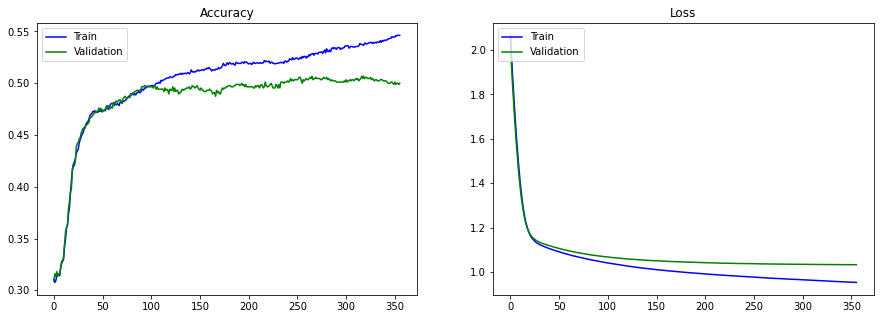

In [8]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(trainEpl.history['accuracy'], label='Train', color="blue")
plt.plot(trainEpl.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(trainEpl.history['loss'], label='Train', color="blue")
plt.plot(trainEpl.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

### Dynamic Neural Network

In [9]:
def buildNN( name, input_data, learning_rate, layers, dropout_rate ):
    
    input_shape = ( input_data.shape[1], )
    
    nn_model = Sequential( name=name )
    nn_model.add( Input(shape=input_shape ))
    # nn_model.add(Flatten())
    
    for layer in layers:
        nn_model.add( Dense(layer, activation = 'relu', kernel_initializer="he_normal") )
    nn_model.add( Dropout(dropout_rate) )

    # Output    
    nn_model.add( Dense(3 , activation='softmax') )
    nn_model.compile( optimizer=Adam(learning_rate=learning_rate), 
        loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
    nn_model.summary()
    
    return nn_model

### EPL

In [10]:
# EPL[1e-05, ‘41–75–3’, 0.5, 16, 2.8191776275634766, 0.6168224215507507]
epl_best_model = buildNN( "epl_roland-shun-41-75-3", X_train_epl, 0.00001, [41,75], 0.5 )

Model: "epl_roland-shun-41-75-3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 41)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 228       
Total params: 4,608
Trainable params: 4,608
Non-trainable params: 0
_________________________________________________________________


In [11]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
training = epl_best_model.fit( 
    X_train_epl, 
    y_train_epl, 
    batch_size = 16, 
    epochs = 500,
    validation_data = (X_test_epl,y_test_epl),
    callbacks = [ earlyStopping ],
    verbose = 2
)

Train on 1772 samples, validate on 874 samples
Epoch 1/500
1772/1772 - 0s - loss: 3.4540 - accuracy: 0.2698 - val_loss: 2.7175 - val_accuracy: 0.2506
Epoch 2/500
1772/1772 - 0s - loss: 3.4055 - accuracy: 0.2726 - val_loss: 2.6061 - val_accuracy: 0.2506
Epoch 3/500
1772/1772 - 0s - loss: 3.2488 - accuracy: 0.2765 - val_loss: 2.5005 - val_accuracy: 0.2494
Epoch 4/500
1772/1772 - 0s - loss: 3.1680 - accuracy: 0.2726 - val_loss: 2.4003 - val_accuracy: 0.2494
Epoch 5/500
1772/1772 - 0s - loss: 3.0569 - accuracy: 0.2777 - val_loss: 2.3061 - val_accuracy: 0.2471
Epoch 6/500
1772/1772 - 0s - loss: 2.8995 - accuracy: 0.2856 - val_loss: 2.2152 - val_accuracy: 0.2494
Epoch 7/500
1772/1772 - 0s - loss: 2.9307 - accuracy: 0.2754 - val_loss: 2.1266 - val_accuracy: 0.2574
Epoch 8/500
1772/1772 - 0s - loss: 2.7966 - accuracy: 0.2895 - val_loss: 2.0447 - val_accuracy: 0.2586
Epoch 9/500
1772/1772 - 0s - loss: 2.6665 - accuracy: 0.3030 - val_loss: 1.9638 - val_accuracy: 0.2620
Epoch 10/500
1772/1772 - 0

Epoch 80/500
1772/1772 - 0s - loss: 1.3463 - accuracy: 0.4458 - val_loss: 1.0958 - val_accuracy: 0.4943
Epoch 81/500
1772/1772 - 0s - loss: 1.3858 - accuracy: 0.4345 - val_loss: 1.0937 - val_accuracy: 0.4954
Epoch 82/500
1772/1772 - 0s - loss: 1.3867 - accuracy: 0.4334 - val_loss: 1.0914 - val_accuracy: 0.4954
Epoch 83/500
1772/1772 - 0s - loss: 1.3739 - accuracy: 0.4470 - val_loss: 1.0906 - val_accuracy: 0.4954
Epoch 84/500
1772/1772 - 0s - loss: 1.3404 - accuracy: 0.4441 - val_loss: 1.0888 - val_accuracy: 0.4989
Epoch 85/500
1772/1772 - 0s - loss: 1.3504 - accuracy: 0.4430 - val_loss: 1.0874 - val_accuracy: 0.5000
Epoch 86/500
1772/1772 - 0s - loss: 1.3700 - accuracy: 0.4430 - val_loss: 1.0866 - val_accuracy: 0.5011
Epoch 87/500
1772/1772 - 0s - loss: 1.3788 - accuracy: 0.4441 - val_loss: 1.0853 - val_accuracy: 0.5011
Epoch 88/500
1772/1772 - 0s - loss: 1.3099 - accuracy: 0.4571 - val_loss: 1.0840 - val_accuracy: 0.5000
Epoch 89/500
1772/1772 - 0s - loss: 1.3710 - accuracy: 0.4306 - 

Epoch 159/500
1772/1772 - 0s - loss: 1.1161 - accuracy: 0.4740 - val_loss: 1.0222 - val_accuracy: 0.5206
Epoch 160/500
1772/1772 - 0s - loss: 1.1194 - accuracy: 0.4769 - val_loss: 1.0216 - val_accuracy: 0.5206
Epoch 161/500
1772/1772 - 0s - loss: 1.1330 - accuracy: 0.4718 - val_loss: 1.0214 - val_accuracy: 0.5206
Epoch 162/500
1772/1772 - 0s - loss: 1.1093 - accuracy: 0.4825 - val_loss: 1.0212 - val_accuracy: 0.5195
Epoch 163/500
1772/1772 - 0s - loss: 1.0914 - accuracy: 0.4786 - val_loss: 1.0206 - val_accuracy: 0.5183
Epoch 164/500
1772/1772 - 0s - loss: 1.1340 - accuracy: 0.4678 - val_loss: 1.0201 - val_accuracy: 0.5183
Epoch 165/500
1772/1772 - 0s - loss: 1.0869 - accuracy: 0.4786 - val_loss: 1.0196 - val_accuracy: 0.5206
Epoch 166/500
1772/1772 - 0s - loss: 1.1141 - accuracy: 0.4752 - val_loss: 1.0190 - val_accuracy: 0.5195
Epoch 167/500
1772/1772 - 0s - loss: 1.1067 - accuracy: 0.4588 - val_loss: 1.0186 - val_accuracy: 0.5183
Epoch 168/500
1772/1772 - 0s - loss: 1.1175 - accuracy:

1772/1772 - 0s - loss: 1.0391 - accuracy: 0.4949 - val_loss: 1.0043 - val_accuracy: 0.5160
Epoch 238/500
1772/1772 - 0s - loss: 1.0273 - accuracy: 0.4966 - val_loss: 1.0040 - val_accuracy: 0.5160
Epoch 239/500
1772/1772 - 0s - loss: 1.0248 - accuracy: 0.5056 - val_loss: 1.0040 - val_accuracy: 0.5160
Epoch 240/500
1772/1772 - 0s - loss: 1.0282 - accuracy: 0.5073 - val_loss: 1.0038 - val_accuracy: 0.5172
Epoch 241/500
1772/1772 - 0s - loss: 1.0441 - accuracy: 0.5006 - val_loss: 1.0037 - val_accuracy: 0.5172
Epoch 242/500
1772/1772 - 0s - loss: 1.0343 - accuracy: 0.5141 - val_loss: 1.0036 - val_accuracy: 0.5172
Epoch 243/500
1772/1772 - 0s - loss: 1.0211 - accuracy: 0.5045 - val_loss: 1.0037 - val_accuracy: 0.5160
Epoch 244/500
1772/1772 - 0s - loss: 1.0268 - accuracy: 0.5040 - val_loss: 1.0035 - val_accuracy: 0.5172
Epoch 245/500
1772/1772 - 0s - loss: 1.0353 - accuracy: 0.5062 - val_loss: 1.0034 - val_accuracy: 0.5160
Epoch 246/500
1772/1772 - 0s - loss: 1.0433 - accuracy: 0.4898 - val_

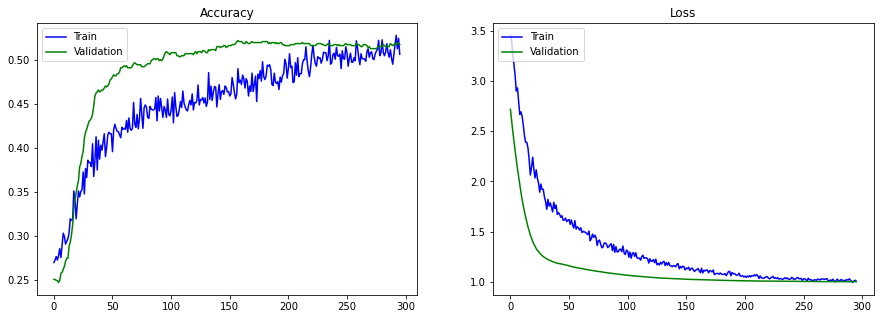

In [12]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(training.history['accuracy'], label='Train', color="blue")
plt.plot(training.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(training.history['loss'], label='Train', color="blue")
plt.plot(training.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

In [13]:
# Save model
save_path = "saved_models\\" + epl_best_model.name + ".h5"
epl_best_model.save( save_path )

### La Liga

In [14]:
# La Liga[1e-05, ‘41–10–10–10–3’, 0, 32, 0.9817492961883545, 0.5420560836791992]
spl_best_model = buildNN( "spl_roland-shun-41-10-10-10", X_train_spl, 0.00001, [41,10,10,10], 0 )

Model: "spl_roland-shun-41-10-10-10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 41)                1230      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 33        
Total params: 1,903
Trainable params: 1,903
Non-trainable params: 0
_____________________________________

In [15]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1 )
spl_training = spl_best_model.fit( 
    X_train_spl, 
    y_train_spl,
    batch_size = 32,
    epochs = 500,
    validation_data = (X_test_spl, y_test_spl),
    callbacks = [ earlyStopping ],
    verbose = 2
)

Train on 1775 samples, validate on 875 samples
Epoch 1/500
1775/1775 - 0s - loss: 3.4596 - accuracy: 0.2738 - val_loss: 3.2754 - val_accuracy: 0.2880
Epoch 2/500
1775/1775 - 0s - loss: 3.3668 - accuracy: 0.2721 - val_loss: 3.1901 - val_accuracy: 0.2834
Epoch 3/500
1775/1775 - 0s - loss: 3.2783 - accuracy: 0.2738 - val_loss: 3.1096 - val_accuracy: 0.2846
Epoch 4/500
1775/1775 - 0s - loss: 3.1944 - accuracy: 0.2715 - val_loss: 3.0341 - val_accuracy: 0.2857
Epoch 5/500
1775/1775 - 0s - loss: 3.1145 - accuracy: 0.2727 - val_loss: 2.9617 - val_accuracy: 0.2891
Epoch 6/500
1775/1775 - 0s - loss: 3.0373 - accuracy: 0.2687 - val_loss: 2.8920 - val_accuracy: 0.2857
Epoch 7/500
1775/1775 - 0s - loss: 2.9640 - accuracy: 0.2670 - val_loss: 2.8257 - val_accuracy: 0.2846
Epoch 8/500
1775/1775 - 0s - loss: 2.8944 - accuracy: 0.2665 - val_loss: 2.7632 - val_accuracy: 0.2834
Epoch 9/500
1775/1775 - 0s - loss: 2.8288 - accuracy: 0.2654 - val_loss: 2.7019 - val_accuracy: 0.2846
Epoch 10/500
1775/1775 - 0

Epoch 80/500
1775/1775 - 0s - loss: 1.2710 - accuracy: 0.2693 - val_loss: 1.2591 - val_accuracy: 0.3029
Epoch 81/500
1775/1775 - 0s - loss: 1.2653 - accuracy: 0.2704 - val_loss: 1.2540 - val_accuracy: 0.3017
Epoch 82/500
1775/1775 - 0s - loss: 1.2598 - accuracy: 0.2721 - val_loss: 1.2489 - val_accuracy: 0.3017
Epoch 83/500
1775/1775 - 0s - loss: 1.2543 - accuracy: 0.2727 - val_loss: 1.2441 - val_accuracy: 0.2983
Epoch 84/500
1775/1775 - 0s - loss: 1.2491 - accuracy: 0.2721 - val_loss: 1.2394 - val_accuracy: 0.2960
Epoch 85/500
1775/1775 - 0s - loss: 1.2440 - accuracy: 0.2721 - val_loss: 1.2348 - val_accuracy: 0.2949
Epoch 86/500
1775/1775 - 0s - loss: 1.2391 - accuracy: 0.2732 - val_loss: 1.2304 - val_accuracy: 0.2949
Epoch 87/500
1775/1775 - 0s - loss: 1.2342 - accuracy: 0.2732 - val_loss: 1.2262 - val_accuracy: 0.2983
Epoch 88/500
1775/1775 - 0s - loss: 1.2296 - accuracy: 0.2755 - val_loss: 1.2219 - val_accuracy: 0.2994
Epoch 89/500
1775/1775 - 0s - loss: 1.2250 - accuracy: 0.2777 - 

Epoch 159/500
1775/1775 - 0s - loss: 1.0824 - accuracy: 0.4186 - val_loss: 1.0958 - val_accuracy: 0.3874
Epoch 160/500
1775/1775 - 0s - loss: 1.0815 - accuracy: 0.4192 - val_loss: 1.0951 - val_accuracy: 0.3863
Epoch 161/500
1775/1775 - 0s - loss: 1.0807 - accuracy: 0.4225 - val_loss: 1.0944 - val_accuracy: 0.3863
Epoch 162/500
1775/1775 - 0s - loss: 1.0800 - accuracy: 0.4237 - val_loss: 1.0938 - val_accuracy: 0.3886
Epoch 163/500
1775/1775 - 0s - loss: 1.0792 - accuracy: 0.4259 - val_loss: 1.0931 - val_accuracy: 0.3897
Epoch 164/500
1775/1775 - 0s - loss: 1.0785 - accuracy: 0.4299 - val_loss: 1.0924 - val_accuracy: 0.3920
Epoch 165/500
1775/1775 - 0s - loss: 1.0777 - accuracy: 0.4304 - val_loss: 1.0918 - val_accuracy: 0.3909
Epoch 166/500
1775/1775 - 0s - loss: 1.0770 - accuracy: 0.4299 - val_loss: 1.0912 - val_accuracy: 0.3897
Epoch 167/500
1775/1775 - 0s - loss: 1.0763 - accuracy: 0.4299 - val_loss: 1.0906 - val_accuracy: 0.3943
Epoch 168/500
1775/1775 - 0s - loss: 1.0756 - accuracy:

1775/1775 - 0s - loss: 1.0460 - accuracy: 0.5132 - val_loss: 1.0689 - val_accuracy: 0.4640
Epoch 238/500
1775/1775 - 0s - loss: 1.0456 - accuracy: 0.5138 - val_loss: 1.0687 - val_accuracy: 0.4651
Epoch 239/500
1775/1775 - 0s - loss: 1.0453 - accuracy: 0.5127 - val_loss: 1.0685 - val_accuracy: 0.4663
Epoch 240/500
1775/1775 - 0s - loss: 1.0450 - accuracy: 0.5132 - val_loss: 1.0683 - val_accuracy: 0.4663
Epoch 241/500
1775/1775 - 0s - loss: 1.0446 - accuracy: 0.5144 - val_loss: 1.0681 - val_accuracy: 0.4663
Epoch 242/500
1775/1775 - 0s - loss: 1.0443 - accuracy: 0.5155 - val_loss: 1.0679 - val_accuracy: 0.4697
Epoch 243/500
1775/1775 - 0s - loss: 1.0440 - accuracy: 0.5144 - val_loss: 1.0677 - val_accuracy: 0.4697
Epoch 244/500
1775/1775 - 0s - loss: 1.0437 - accuracy: 0.5132 - val_loss: 1.0674 - val_accuracy: 0.4697
Epoch 245/500
1775/1775 - 0s - loss: 1.0434 - accuracy: 0.5138 - val_loss: 1.0672 - val_accuracy: 0.4697
Epoch 246/500
1775/1775 - 0s - loss: 1.0430 - accuracy: 0.5144 - val_

Epoch 316/500
1775/1775 - 0s - loss: 1.0212 - accuracy: 0.5172 - val_loss: 1.0522 - val_accuracy: 0.4777
Epoch 317/500
1775/1775 - 0s - loss: 1.0209 - accuracy: 0.5194 - val_loss: 1.0520 - val_accuracy: 0.4766
Epoch 318/500
1775/1775 - 0s - loss: 1.0206 - accuracy: 0.5177 - val_loss: 1.0518 - val_accuracy: 0.4766
Epoch 319/500
1775/1775 - 0s - loss: 1.0204 - accuracy: 0.5177 - val_loss: 1.0517 - val_accuracy: 0.4766
Epoch 320/500
1775/1775 - 0s - loss: 1.0201 - accuracy: 0.5189 - val_loss: 1.0515 - val_accuracy: 0.4766
Epoch 321/500
1775/1775 - 0s - loss: 1.0198 - accuracy: 0.5183 - val_loss: 1.0513 - val_accuracy: 0.4766
Epoch 322/500
1775/1775 - 0s - loss: 1.0196 - accuracy: 0.5183 - val_loss: 1.0511 - val_accuracy: 0.4766
Epoch 323/500
1775/1775 - 0s - loss: 1.0193 - accuracy: 0.5183 - val_loss: 1.0510 - val_accuracy: 0.4777
Epoch 324/500
1775/1775 - 0s - loss: 1.0190 - accuracy: 0.5183 - val_loss: 1.0508 - val_accuracy: 0.4777
Epoch 325/500
1775/1775 - 0s - loss: 1.0187 - accuracy:

1775/1775 - 0s - loss: 1.0009 - accuracy: 0.5245 - val_loss: 1.0382 - val_accuracy: 0.4834
Epoch 395/500
1775/1775 - 0s - loss: 1.0007 - accuracy: 0.5245 - val_loss: 1.0381 - val_accuracy: 0.4834
Epoch 396/500
1775/1775 - 0s - loss: 1.0004 - accuracy: 0.5256 - val_loss: 1.0379 - val_accuracy: 0.4834
Epoch 397/500
1775/1775 - 0s - loss: 1.0002 - accuracy: 0.5256 - val_loss: 1.0377 - val_accuracy: 0.4834
Epoch 398/500
1775/1775 - 0s - loss: 0.9999 - accuracy: 0.5256 - val_loss: 1.0375 - val_accuracy: 0.4834
Epoch 399/500
1775/1775 - 0s - loss: 0.9997 - accuracy: 0.5256 - val_loss: 1.0373 - val_accuracy: 0.4846
Epoch 400/500
1775/1775 - 0s - loss: 0.9995 - accuracy: 0.5262 - val_loss: 1.0372 - val_accuracy: 0.4846
Epoch 401/500
1775/1775 - 0s - loss: 0.9992 - accuracy: 0.5262 - val_loss: 1.0371 - val_accuracy: 0.4834
Epoch 402/500
1775/1775 - 0s - loss: 0.9990 - accuracy: 0.5251 - val_loss: 1.0369 - val_accuracy: 0.4834
Epoch 403/500
1775/1775 - 0s - loss: 0.9987 - accuracy: 0.5251 - val_

Epoch 473/500
1775/1775 - 0s - loss: 0.9835 - accuracy: 0.5285 - val_loss: 1.0278 - val_accuracy: 0.4880
Epoch 474/500
1775/1775 - 0s - loss: 0.9833 - accuracy: 0.5285 - val_loss: 1.0277 - val_accuracy: 0.4880
Epoch 475/500
1775/1775 - 0s - loss: 0.9831 - accuracy: 0.5290 - val_loss: 1.0276 - val_accuracy: 0.4869
Epoch 476/500
1775/1775 - 0s - loss: 0.9829 - accuracy: 0.5285 - val_loss: 1.0275 - val_accuracy: 0.4880
Epoch 477/500
1775/1775 - 0s - loss: 0.9827 - accuracy: 0.5279 - val_loss: 1.0274 - val_accuracy: 0.4880
Epoch 478/500
1775/1775 - 0s - loss: 0.9825 - accuracy: 0.5273 - val_loss: 1.0273 - val_accuracy: 0.4869
Epoch 479/500
1775/1775 - 0s - loss: 0.9823 - accuracy: 0.5273 - val_loss: 1.0272 - val_accuracy: 0.4869
Epoch 480/500
1775/1775 - 0s - loss: 0.9821 - accuracy: 0.5273 - val_loss: 1.0271 - val_accuracy: 0.4869
Epoch 481/500
1775/1775 - 0s - loss: 0.9819 - accuracy: 0.5268 - val_loss: 1.0270 - val_accuracy: 0.4869
Epoch 482/500
1775/1775 - 0s - loss: 0.9817 - accuracy:

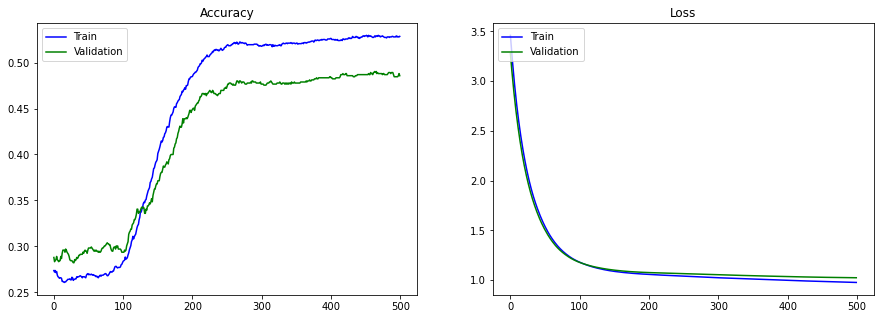

In [16]:
plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(spl_training.history['accuracy'], label='Train', color="blue")
plt.plot(spl_training.history['val_accuracy'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(spl_training.history['loss'], label='Train', color="blue")
plt.plot(spl_training.history['val_loss'], label='Validation', color="green")
plt.legend(loc="upper left")
plt.title("Loss")
plt.show()

In [17]:
# Save model
save_path = "saved_models\\" + spl_best_model.name + ".h5"
spl_best_model.save( save_path )